© Alexander Jüstel, Fraunhofer IEG, Institution for Energy Infrastructures and Geothermal Systems, RWTH Aachen University,
GNU Lesser General Public License v3.0

# 09 Processing Data Type 3 - Polygons representative for Administrative Units

This notebook illustrates how to process data of Data Type 3 - Polygons representative for Administrative Units. The input data is provided as polygon data corresponding to the heat demand of an entire adminstrative unit. The heat demand will now be distributed according to existing heat demand distributions or according to population density.

## Importing Libraries

In [16]:
import rasterio
from rasterio.plot import show
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import box
import matplotlib.pyplot as plt

from pyheatdemand import processing 

## Loading Heat Demand Data

The sample data is loaded using `GeoPandas`.

In [69]:
data = gpd.read_file('../data/Data_Type_III_Polygons_Administrative_Areas.shp')[['WOHNGEB_WB', 'geometry']]
data['area'] = data.area
boundaries = data.copy(deep=True)
data.head()

WOHNGEB_WB                                           geometry   
0  1.006316e+08  POLYGON ((3839610.315 2725298.407, 3839616.590...  \
1  1.664953e+08  POLYGON ((3847115.212 2725703.254, 3847183.552...   
2  2.221946e+08  POLYGON ((3858184.654 2712426.121, 3858203.989...   
3  1.173582e+08  POLYGON ((3852578.988 2702033.636, 3852593.049...   
4  1.779603e+08  POLYGON ((3869614.528 2720818.892, 3869614.010...   

           area  
0  3.552026e+07  
1  3.112942e+07  
2  9.134414e+07  
3  6.258320e+07  
4  9.741098e+07

<Axes: >

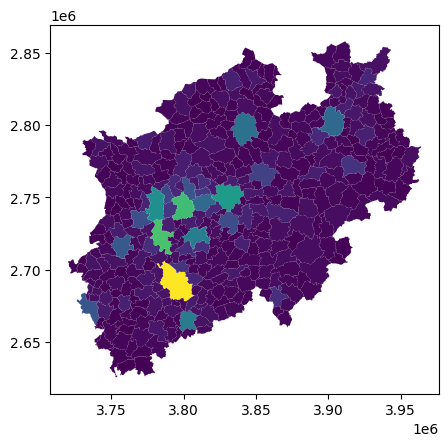

In [70]:
data.plot(column='WOHNGEB_WB')

In [71]:
data.geometry = data.centroid
data

WOHNGEB_WB                         geometry          area
0    1.006316e+08  POINT (3835461.716 2722876.519)  3.552026e+07
1    1.664953e+08  POINT (3848035.239 2722072.566)  3.112942e+07
2    2.221946e+08  POINT (3857888.677 2707583.718)  9.134414e+07
3    1.173582e+08  POINT (3849018.630 2698262.546)  6.258320e+07
4    1.779603e+08  POINT (3865677.016 2715814.262)  9.741098e+07
..            ...                              ...           ...
391  3.622419e+08  POINT (3837280.114 2741444.733)  5.243011e+07
392  2.055584e+08  POINT (3832100.855 2768877.955)  5.632939e+07
393  4.548273e+08  POINT (3847849.933 2752759.514)  8.259447e+07
394  2.450394e+08  POINT (3841458.870 2767987.089)  7.100126e+07
395  3.232237e+08  POINT (3927220.564 2804158.069)  9.406939e+07

[396 rows x 3 columns]

<Axes: >

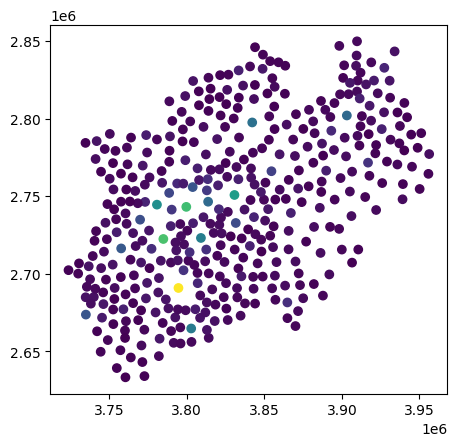

In [72]:
data.plot(column='WOHNGEB_WB')

## Loading Administrative Boundaries

We are loading the administrative boundaries corresponding to each point. 

In [73]:
boundaries

WOHNGEB_WB                                           geometry   
0    1.006316e+08  POLYGON ((3839610.315 2725298.407, 3839616.590...  \
1    1.664953e+08  POLYGON ((3847115.212 2725703.254, 3847183.552...   
2    2.221946e+08  POLYGON ((3858184.654 2712426.121, 3858203.989...   
3    1.173582e+08  POLYGON ((3852578.988 2702033.636, 3852593.049...   
4    1.779603e+08  POLYGON ((3869614.528 2720818.892, 3869614.010...   
..            ...                                                ...   
391  3.622419e+08  POLYGON ((3841136.193 2744853.133, 3841138.716...   
392  2.055584e+08  POLYGON ((3834367.144 2771789.747, 3834367.111...   
393  4.548273e+08  POLYGON ((3855349.769 2754428.188, 3855351.526...   
394  2.450394e+08  POLYGON ((3844334.555 2772238.701, 3844330.021...   
395  3.232237e+08  POLYGON ((3931848.170 2806687.306, 3931850.218...   

             area  
0    3.552026e+07  
1    3.112942e+07  
2    9.134414e+07  
3    6.258320e+07  
4    9.741098e+07  
..            ...  
391  5.243011e+07  
392  5.632939e+07  
393  8.259447e+07  
394  7.100126e+07  
395  9.406939e+07  

[396 rows x 3 columns]

<Axes: >

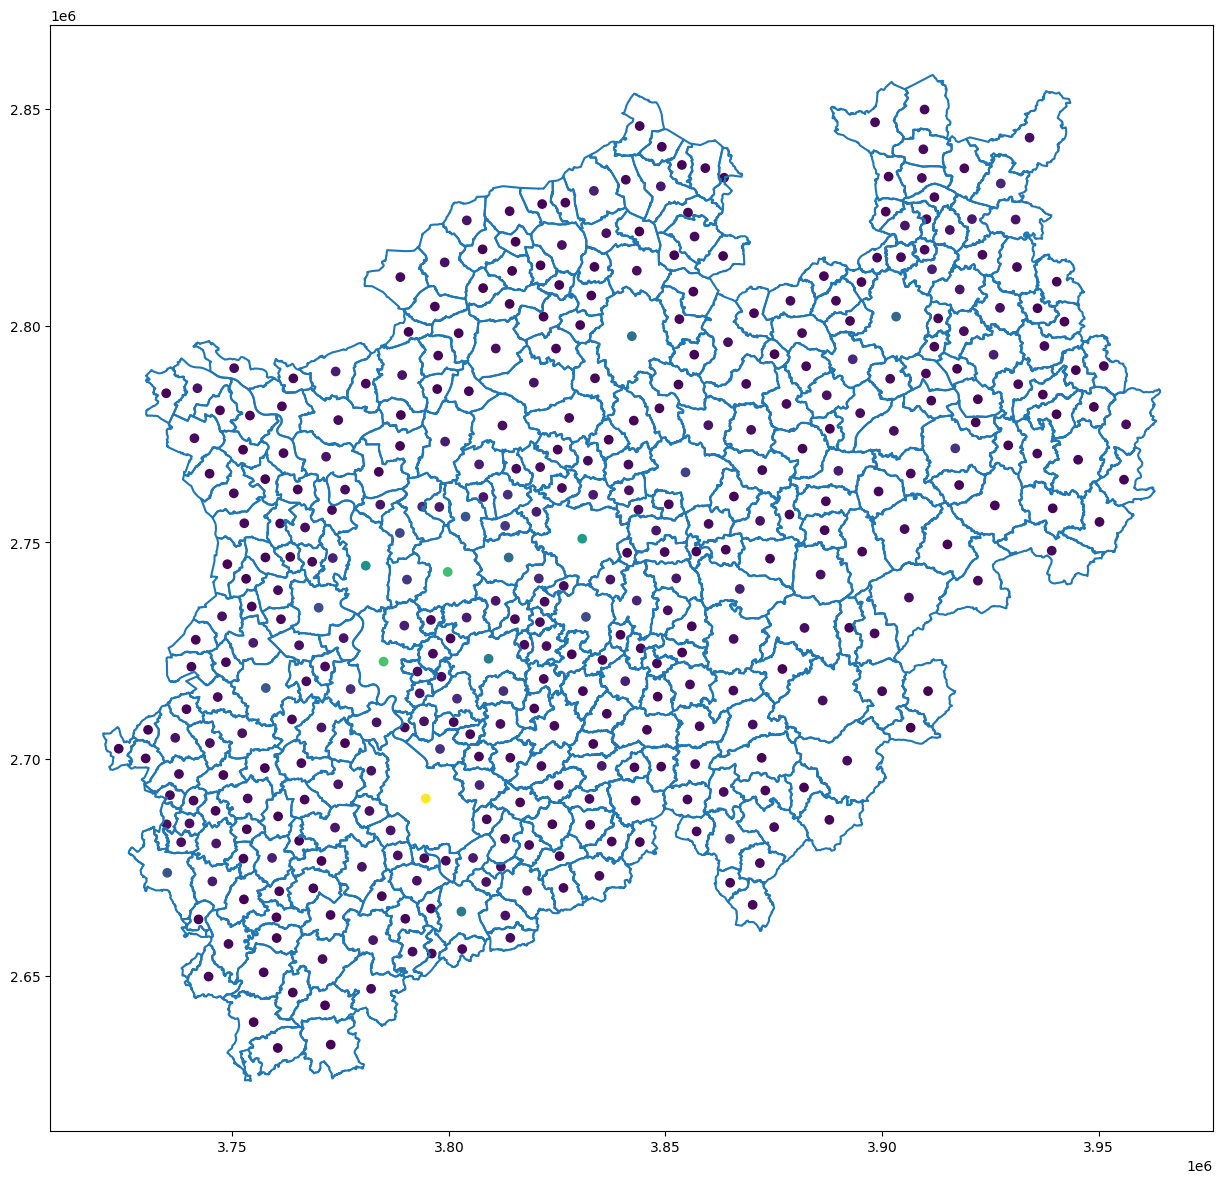

In [74]:
fig, ax = plt.subplots(figsize=(15,15))

boundaries.boundary.plot(ax=ax)
data.plot(ax=ax, column='WOHNGEB_WB')

## Loading Population Density

In [75]:
popdens = rasterio.open('../data/Bevoelkerungszahl.tif')
popdens

<open DatasetReader name='../data/Bevoelkerungszahl.tif' mode='r'>

In [76]:
popdens.crs

CRS.from_wkt('PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["IRENET95",SPHEROID["GRS 1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

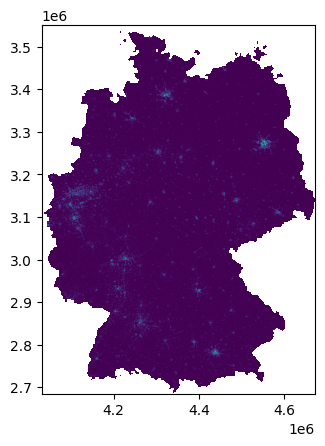

<Axes: >

In [77]:
show(popdens)

In [78]:
popdens_vector = processing.vectorize_raster(path='../data/Bevoelkerungszahl.tif')
popdens_vector

geometry  class
0       POLYGON ((4218000.000 3551000.000, 4218000.000...    4.0
1       POLYGON ((4219000.000 3548000.000, 4219000.000...  177.0
2       POLYGON ((4220000.000 3548000.000, 4220000.000...  665.0
3       POLYGON ((4221000.000 3548000.000, 4221000.000...   13.0
4       POLYGON ((4219000.000 3547000.000, 4219000.000...  134.0
...                                                   ...    ...
226334  POLYGON ((4341000.000 2692000.000, 4341000.000...   22.0
226335  POLYGON ((4341000.000 2691000.000, 4341000.000...    3.0
226336  POLYGON ((4337000.000 2690000.000, 4337000.000...    8.0
226337  POLYGON ((4341000.000 2690000.000, 4341000.000...    7.0
226338  POLYGON ((4353000.000 2724000.000, 4353000.000...   -1.0

[226339 rows x 2 columns]

In [79]:
popdens_vector = popdens_vector.replace(-1,np.NaN).dropna().reset_index(drop=True)
popdens_vector['area'] = popdens_vector.area
popdens_vector

geometry  class       area
0       POLYGON ((4218000.000 3551000.000, 4218000.000...    4.0  1000000.0
1       POLYGON ((4219000.000 3548000.000, 4219000.000...  177.0  1000000.0
2       POLYGON ((4220000.000 3548000.000, 4220000.000...  665.0  1000000.0
3       POLYGON ((4221000.000 3548000.000, 4221000.000...   13.0  1000000.0
4       POLYGON ((4219000.000 3547000.000, 4219000.000...  134.0  1000000.0
...                                                   ...    ...        ...
211688  POLYGON ((4340000.000 2692000.000, 4340000.000...    3.0  1000000.0
211689  POLYGON ((4341000.000 2692000.000, 4341000.000...   22.0  1000000.0
211690  POLYGON ((4341000.000 2691000.000, 4341000.000...    3.0  1000000.0
211691  POLYGON ((4337000.000 2690000.000, 4337000.000...    8.0  1000000.0
211692  POLYGON ((4341000.000 2690000.000, 4341000.000...    7.0  1000000.0

[211693 rows x 3 columns]

In [80]:
popdens_vector = popdens_vector.to_crs('EPSG:3034')

<Axes: >

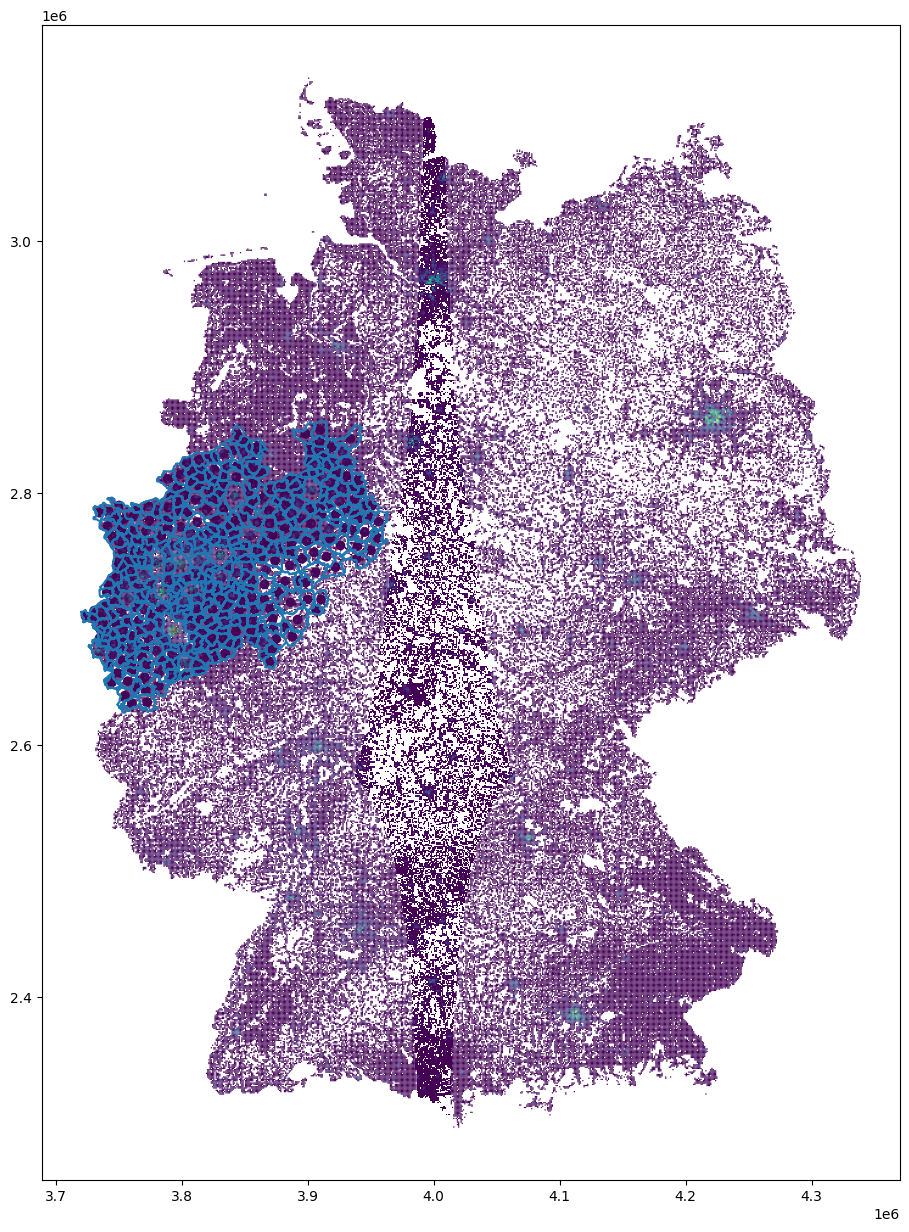

In [81]:
fig, ax = plt.subplots(figsize=(15,15))

boundaries.boundary.plot(ax=ax)
data.plot(ax=ax, column='WOHNGEB_WB')
popdens_vector.plot(ax=ax,column='class')

## Spatially join Heat Demand and Population Density

In [82]:
popdens_hd = gpd.sjoin(left_df=boundaries,
                             right_df=data,
                             how='left').drop('index_right', axis=1)
popdens_hd

WOHNGEB_WB_left                                           geometry   
0       1.006316e+08  POLYGON ((3839610.315 2725298.407, 3839616.590...  \
1       1.664953e+08  POLYGON ((3847115.212 2725703.254, 3847183.552...   
2       2.221946e+08  POLYGON ((3858184.654 2712426.121, 3858203.989...   
3       1.173582e+08  POLYGON ((3852578.988 2702033.636, 3852593.049...   
4       1.779603e+08  POLYGON ((3869614.528 2720818.892, 3869614.010...   
..               ...                                                ...   
391     3.622419e+08  POLYGON ((3841136.193 2744853.133, 3841138.716...   
392     2.055584e+08  POLYGON ((3834367.144 2771789.747, 3834367.111...   
393     4.548273e+08  POLYGON ((3855349.769 2754428.188, 3855351.526...   
394     2.450394e+08  POLYGON ((3844334.555 2772238.701, 3844330.021...   
395     3.232237e+08  POLYGON ((3931848.170 2806687.306, 3931850.218...   

        area_left  WOHNGEB_WB_right    area_right  
0    3.552026e+07      1.006316e+08  3.552026e+07  
1    3.112942e+07      1.664953e+08  3.112942e+07  
2    9.134414e+07      2.221946e+08  9.134414e+07  
3    6.258320e+07      1.173582e+08  6.258320e+07  
4    9.741098e+07      1.779603e+08  9.741098e+07  
..            ...               ...           ...  
391  5.243011e+07      3.622419e+08  5.243011e+07  
392  5.632939e+07      2.055584e+08  5.632939e+07  
393  8.259447e+07      4.548273e+08  8.259447e+07  
394  7.100126e+07      2.450394e+08  7.100126e+07  
395  9.406939e+07      3.232237e+08  9.406939e+07  

[396 rows x 5 columns]

## Overlaying the Heat Demand Data with the Communities

The heat demand data is overlain with the communities. 

In [83]:
popdens_overlay = gpd.overlay(popdens_vector, boundaries)
popdens_overlay.head()

class     area_1    WOHNGEB_WB        area_2   
0   21.0  1000000.0  1.870821e+08  1.283045e+08  \
1   32.0  1000000.0  1.870821e+08  1.283045e+08   
2   39.0  1000000.0  1.870821e+08  1.283045e+08   
3   22.0  1000000.0  1.870821e+08  1.283045e+08   
4    3.0  1000000.0  1.870821e+08  1.283045e+08   

                                            geometry  
0  POLYGON ((3910158.819 2856977.233, 3909841.794...  
1  POLYGON ((3911124.868 2856977.510, 3910158.819...  
2  POLYGON ((3912090.915 2856977.784, 3911124.868...  
3  POLYGON ((3912090.915 2856977.784, 3912090.747...  
4  POLYGON ((3908227.102 2856010.637, 3907989.830...

## Calculate Heat Demand for overlain Polygons

The heat demand for overlain polygons is calculated. 

In [95]:
popdens_overlay['area_new'] = popdens_overlay.area
popdens_overlay['HD'] = popdens_overlay['WOHNGEB_WB'] * popdens_overlay['area_new'] / popdens_overlay['area_1']
popdens_overlay.head()

class     area_1    WOHNGEB_WB        area_2   
0   21.0  1000000.0  1.870821e+08  1.283045e+08  \
1   32.0  1000000.0  1.870821e+08  1.283045e+08   
2   39.0  1000000.0  1.870821e+08  1.283045e+08   
3   22.0  1000000.0  1.870821e+08  1.283045e+08   
4    3.0  1000000.0  1.870821e+08  1.283045e+08   

                                            geometry       area_new   
0  POLYGON ((3910158.819 2856977.233, 3909841.794...   26690.088783  \
1  POLYGON ((3911124.868 2856977.510, 3910158.819...  410598.708870   
2  POLYGON ((3912090.915 2856977.784, 3911124.868...  743949.090501   
3  POLYGON ((3912090.915 2856977.784, 3912090.747...   84765.841111   
4  POLYGON ((3908227.102 2856010.637, 3907989.830...   14664.904148   

             HD  
0  4.993237e+06  
1  7.681566e+07  
2  1.391795e+08  
3  1.585817e+07  
4  2.743541e+06

## Join Heat Demand Data with Communities

The heat demand data will be joined with the communities.

In [96]:
leftjoin_gdf = gpd.sjoin(left_df=popdens_overlay,
                             right_df=boundaries,
                             how='left')
leftjoin_gdf.head()

class     area_1  WOHNGEB_WB_left        area_2   
0   21.0  1000000.0     1.870821e+08  1.283045e+08  \
1   32.0  1000000.0     1.870821e+08  1.283045e+08   
2   39.0  1000000.0     1.870821e+08  1.283045e+08   
3   22.0  1000000.0     1.870821e+08  1.283045e+08   
4    3.0  1000000.0     1.870821e+08  1.283045e+08   

                                            geometry       area_new   
0  POLYGON ((3910158.819 2856977.233, 3909841.794...   26690.088783  \
1  POLYGON ((3911124.868 2856977.510, 3910158.819...  410598.708870   
2  POLYGON ((3912090.915 2856977.784, 3911124.868...  743949.090501   
3  POLYGON ((3912090.915 2856977.784, 3912090.747...   84765.841111   
4  POLYGON ((3908227.102 2856010.637, 3907989.830...   14664.904148   

             HD  index_right  WOHNGEB_WB_right          area  
0  4.993237e+06          226      1.870821e+08  1.283045e+08  
1  7.681566e+07          226      1.870821e+08  1.283045e+08  
2  1.391795e+08          226      1.870821e+08  1.283045e+08  
3  1.585817e+07          226      1.870821e+08  1.283045e+08  
4  2.743541e+06          226      1.870821e+08  1.283045e+08

## Summing up Heat Demand Data per Community

In [97]:
gdf_grouped = (leftjoin_gdf.groupby('index_right')['HD'].sum())

# Concatenating cut polygons with mask polygons
gdf_hd = pd.concat([gdf_grouped,
                    boundaries],
                   axis=1)
gdf_hd = gpd.GeoDataFrame(geometry=gdf_hd['geometry'],
                              data=gdf_hd,
                              crs=boundaries.crs)
gdf_hd

HD    WOHNGEB_WB   
0    1.276523e+10  1.006316e+08  \
1    7.494367e+09  1.664953e+08   
2    2.041537e+10  2.221946e+08   
3    1.083488e+10  1.173582e+08   
4    1.617635e+10  1.779603e+08   
..            ...           ...   
391  5.989690e+10  3.622419e+08   
392  1.520979e+10  2.055584e+08   
393  4.923842e+10  4.548273e+08   
394  2.875010e+10  2.450394e+08   
395  3.701822e+10  3.232237e+08   

                                              geometry          area  
0    POLYGON ((3839610.315 2725298.407, 3839616.590...  3.552026e+07  
1    POLYGON ((3847115.212 2725703.254, 3847183.552...  3.112942e+07  
2    POLYGON ((3858184.654 2712426.121, 3858203.989...  9.134414e+07  
3    POLYGON ((3852578.988 2702033.636, 3852593.049...  6.258320e+07  
4    POLYGON ((3869614.528 2720818.892, 3869614.010...  9.741098e+07  
..                                                 ...           ...  
391  POLYGON ((3841136.193 2744853.133, 3841138.716...  5.243011e+07  
392  POLYGON ((3834367.144 2771789.747, 3834367.111...  5.632939e+07  
393  POLYGON ((3855349.769 2754428.188, 3855351.526...  8.259447e+07  
394  POLYGON ((3844334.555 2772238.701, 3844330.021...  7.100126e+07  
395  POLYGON ((3931848.170 2806687.306, 3931850.218...  9.406939e+07  

[396 rows x 4 columns]

<Axes: >

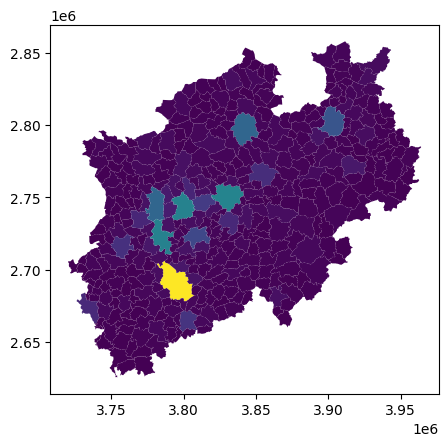

In [98]:
gdf_hd.plot(column='HD')

## Performing second spatial join to get total HD value of community for each polygon

In [99]:
leftjoin_gdf2 = gpd.sjoin(left_df=popdens_overlay,
                             right_df=gdf_hd,
                             how='left')
leftjoin_gdf2.head()

class     area_1  WOHNGEB_WB_left        area_2   
0   21.0  1000000.0     1.870821e+08  1.283045e+08  \
1   32.0  1000000.0     1.870821e+08  1.283045e+08   
2   39.0  1000000.0     1.870821e+08  1.283045e+08   
3   22.0  1000000.0     1.870821e+08  1.283045e+08   
4    3.0  1000000.0     1.870821e+08  1.283045e+08   

                                            geometry       area_new   
0  POLYGON ((3910158.819 2856977.233, 3909841.794...   26690.088783  \
1  POLYGON ((3911124.868 2856977.510, 3910158.819...  410598.708870   
2  POLYGON ((3912090.915 2856977.784, 3911124.868...  743949.090501   
3  POLYGON ((3912090.915 2856977.784, 3912090.747...   84765.841111   
4  POLYGON ((3908227.102 2856010.637, 3907989.830...   14664.904148   

        HD_left  index_right      HD_right  WOHNGEB_WB_right          area  
0  4.993237e+06          226  2.703544e+10      1.870821e+08  1.283045e+08  
1  7.681566e+07          226  2.703544e+10      1.870821e+08  1.283045e+08  
2  1.391795e+08          226  2.703544e+10      1.870821e+08  1.283045e+08  
3  1.585817e+07          226  2.703544e+10      1.870821e+08  1.283045e+08  
4  2.743541e+06          226  2.703544e+10      1.870821e+08  1.283045e+08

## Calculating Fraction of Heat Demand

In [100]:
leftjoin_gdf2['HD_fraction'] = leftjoin_gdf2['HD_left']/leftjoin_gdf2['HD_right']
leftjoin_gdf2.head()

class     area_1  WOHNGEB_WB_left        area_2   
0   21.0  1000000.0     1.870821e+08  1.283045e+08  \
1   32.0  1000000.0     1.870821e+08  1.283045e+08   
2   39.0  1000000.0     1.870821e+08  1.283045e+08   
3   22.0  1000000.0     1.870821e+08  1.283045e+08   
4    3.0  1000000.0     1.870821e+08  1.283045e+08   

                                            geometry       area_new   
0  POLYGON ((3910158.819 2856977.233, 3909841.794...   26690.088783  \
1  POLYGON ((3911124.868 2856977.510, 3910158.819...  410598.708870   
2  POLYGON ((3912090.915 2856977.784, 3911124.868...  743949.090501   
3  POLYGON ((3912090.915 2856977.784, 3912090.747...   84765.841111   
4  POLYGON ((3908227.102 2856010.637, 3907989.830...   14664.904148   

        HD_left  index_right      HD_right  WOHNGEB_WB_right          area   
0  4.993237e+06          226  2.703544e+10      1.870821e+08  1.283045e+08  \
1  7.681566e+07          226  2.703544e+10      1.870821e+08  1.283045e+08   
2  1.391795e+08          226  2.703544e+10      1.870821e+08  1.283045e+08   
3  1.585817e+07          226  2.703544e+10      1.870821e+08  1.283045e+08   
4  2.743541e+06          226  2.703544e+10      1.870821e+08  1.283045e+08   

   HD_fraction  
0     0.000185  
1     0.002841  
2     0.005148  
3     0.000587  
4     0.000101

In [101]:
leftjoin_gdf2['HD_final'] = leftjoin_gdf2['WOHNGEB_WB_right']*leftjoin_gdf2['HD_fraction']
leftjoin_gdf2.head()

class     area_1  WOHNGEB_WB_left        area_2   
0   21.0  1000000.0     1.870821e+08  1.283045e+08  \
1   32.0  1000000.0     1.870821e+08  1.283045e+08   
2   39.0  1000000.0     1.870821e+08  1.283045e+08   
3   22.0  1000000.0     1.870821e+08  1.283045e+08   
4    3.0  1000000.0     1.870821e+08  1.283045e+08   

                                            geometry       area_new   
0  POLYGON ((3910158.819 2856977.233, 3909841.794...   26690.088783  \
1  POLYGON ((3911124.868 2856977.510, 3910158.819...  410598.708870   
2  POLYGON ((3912090.915 2856977.784, 3911124.868...  743949.090501   
3  POLYGON ((3912090.915 2856977.784, 3912090.747...   84765.841111   
4  POLYGON ((3908227.102 2856010.637, 3907989.830...   14664.904148   

        HD_left  index_right      HD_right  WOHNGEB_WB_right          area   
0  4.993237e+06          226  2.703544e+10      1.870821e+08  1.283045e+08  \
1  7.681566e+07          226  2.703544e+10      1.870821e+08  1.283045e+08   
2  1.391795e+08          226  2.703544e+10      1.870821e+08  1.283045e+08   
3  1.585817e+07          226  2.703544e+10      1.870821e+08  1.283045e+08   
4  2.743541e+06          226  2.703544e+10      1.870821e+08  1.283045e+08   

   HD_fraction       HD_final  
0     0.000185   34552.618128  
1     0.002841  531555.383983  
2     0.005148  963106.156749  
3     0.000587  109736.680235  
4     0.000101   18984.981168

In [102]:
data = leftjoin_gdf2[['HD_final', 'geometry']]
data.head()

HD_final                                           geometry
0   34552.618128  POLYGON ((3910158.819 2856977.233, 3909841.794...
1  531555.383983  POLYGON ((3911124.868 2856977.510, 3910158.819...
2  963106.156749  POLYGON ((3912090.915 2856977.784, 3911124.868...
3  109736.680235  POLYGON ((3912090.915 2856977.784, 3912090.747...
4   18984.981168  POLYGON ((3908227.102 2856010.637, 3907989.830...

<Axes: >

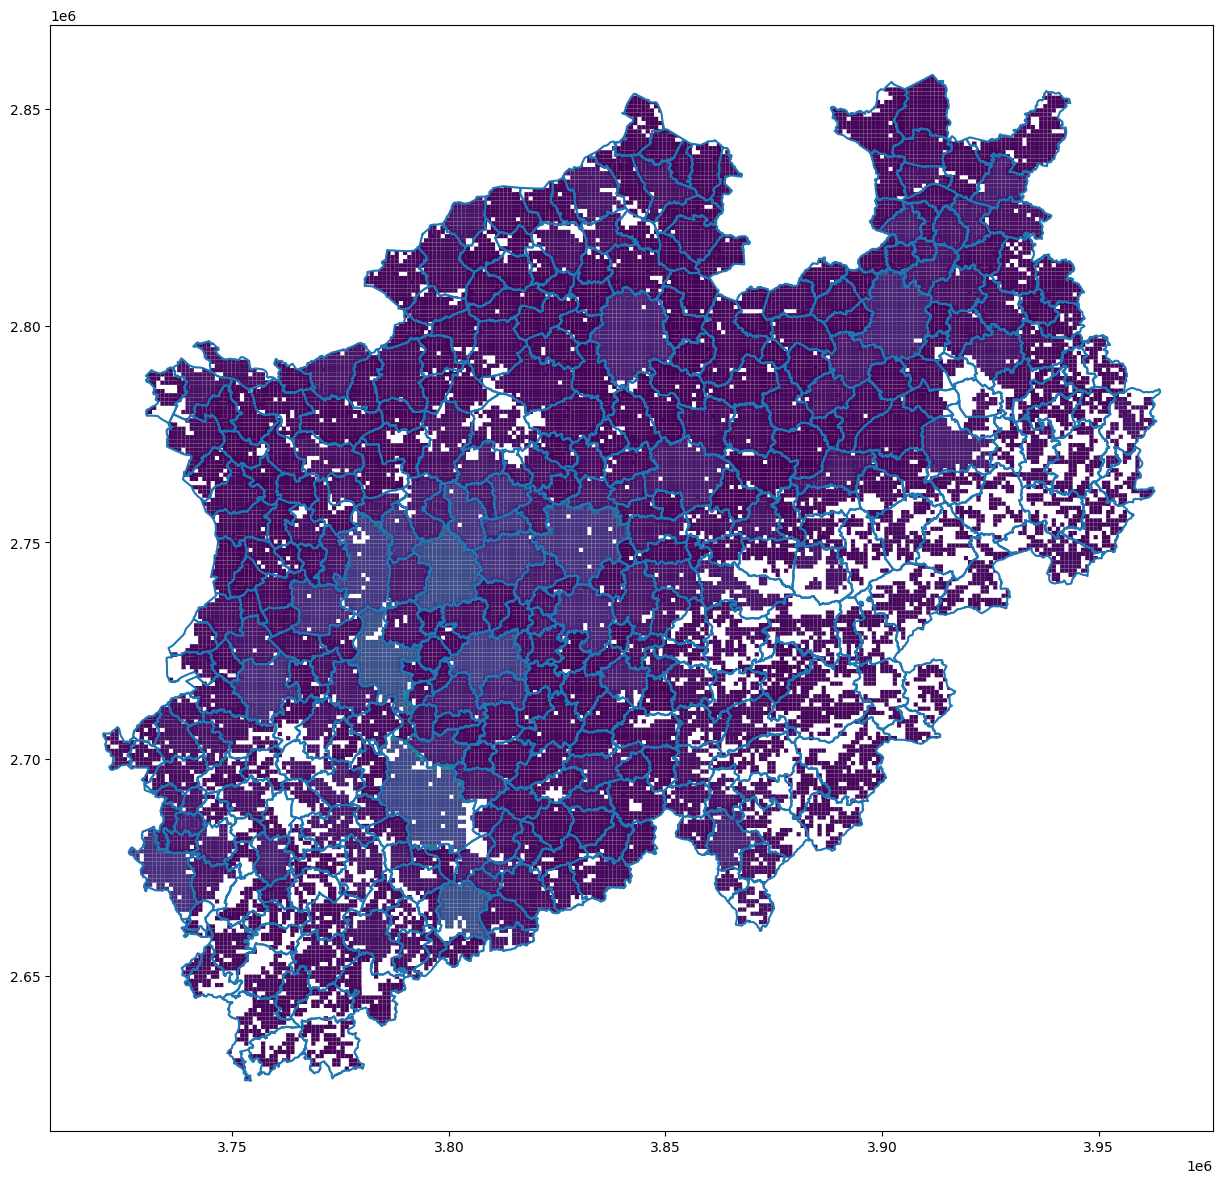

In [103]:
fig, ax = plt.subplots(figsize=(15,15))

boundaries.boundary.plot(ax=ax)
data.plot(ax=ax, column='HD_final')

## Inspect CRS

We are inspecting the CRS and see that is does not match with the desired CRS `EPSG:3034`.

In [104]:
data.crs

<Projected CRS: EPSG:3034>
Name: ETRS89-extended / LCC Europe
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Conformal 2001
- method: Lambert Conic Conformal (2SP)
Datum: Euro

## Creating GeoDataFrame Outline from vectorized Raster

For further processing, we are creating an outline `GeoDataFrame` from the `total_bounds` of the vectorized raster.

In [105]:
gdf = processing.create_outline(data)
gdf

geometry
0  POLYGON ((3963306.208 2626127.190, 3963306.208...

## Loading Interreg Mask

We are loading the previously created 10 km mask. 

In [106]:
mask_10km = gpd.read_file('../data/Interreg_NWE_mask_10km_3034.shp')
mask_10km

FID                                           geometry
0        0  POLYGON ((2651470.877 2955999.353, 2651470.877...
1        1  POLYGON ((2651470.877 2965999.353, 2651470.877...
2        2  POLYGON ((2651470.877 2975999.353, 2651470.877...
3        3  POLYGON ((2651470.877 2985999.353, 2651470.877...
4        4  POLYGON ((2651470.877 2995999.353, 2651470.877...
...    ...                                                ...
9225  9225  POLYGON ((4141470.877 2605999.353, 4141470.877...
9226  9226  POLYGON ((4141470.877 2615999.353, 4141470.877...
9227  9227  POLYGON ((4151470.877 2585999.353, 4151470.877...
9228  9228  POLYGON ((4151470.877 2595999.353, 4151470.877...
9229  9229  POLYGON ((4151470.877 2605999.353, 4151470.877...

[9230 rows x 2 columns]

In [107]:
mask_10km.crs

<Projected CRS: EPSG:3034>
Name: ETRS89-extended / LCC Europe
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Conformal 2001
- method: Lambert Conic Conformal (2SP)
Datum: Euro

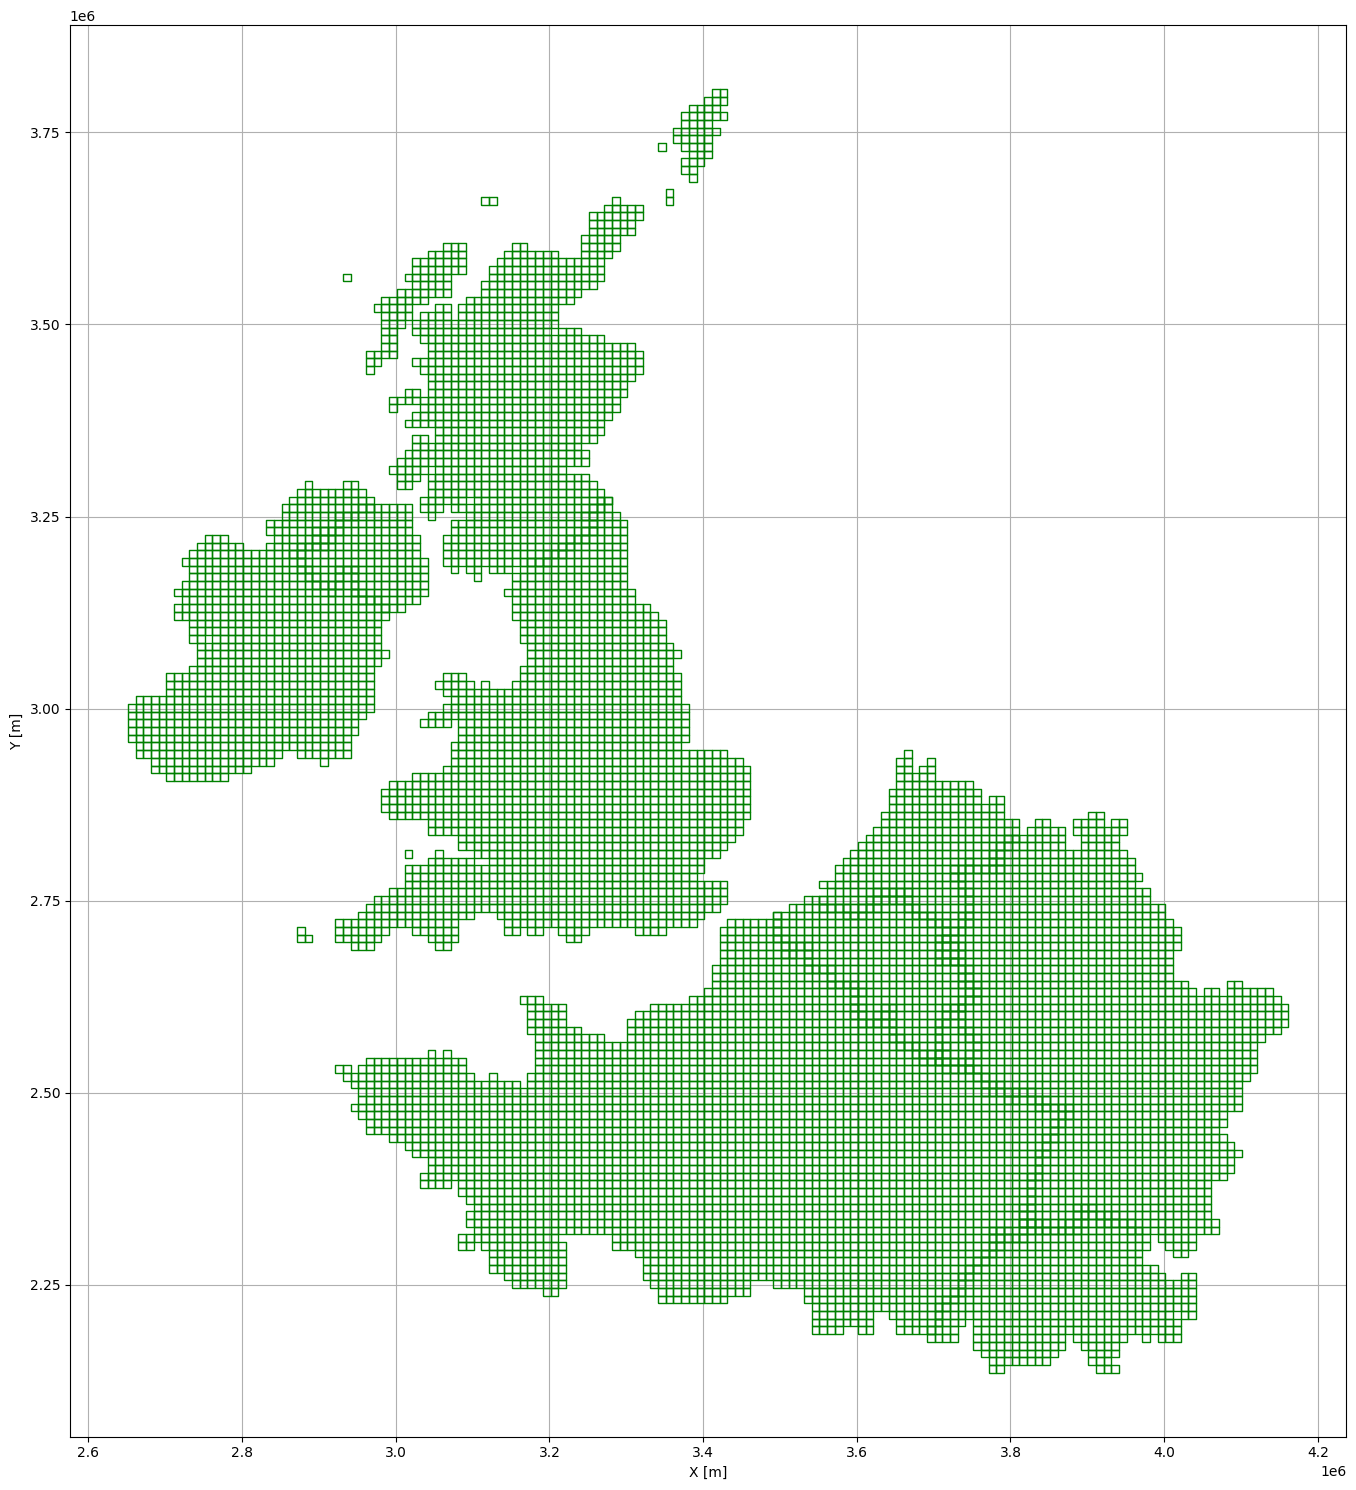

In [108]:
fig, ax = plt.subplots(figsize=(15,15))
mask_10km.boundary.plot(ax=ax, linewidth=1, color='green')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.tight_layout()

## Crop Mask to Data Limits

The 10 km cells that intersect with the data outline are selected. 

In [109]:
mask_10km_cropped = mask_10km.sjoin(gdf).reset_index()[['geometry']]
mask_10km_cropped

geometry
0    POLYGON ((3711470.877 2625999.353, 3711470.877...
1    POLYGON ((3711470.877 2635999.353, 3711470.877...
2    POLYGON ((3711470.877 2645999.353, 3711470.877...
3    POLYGON ((3711470.877 2655999.353, 3711470.877...
4    POLYGON ((3711470.877 2665999.353, 3711470.877...
..                                                 ...
629  POLYGON ((3961470.877 2725999.353, 3961470.877...
630  POLYGON ((3961470.877 2735999.353, 3961470.877...
631  POLYGON ((3961470.877 2745999.353, 3961470.877...
632  POLYGON ((3961470.877 2755999.353, 3961470.877...
633  POLYGON ((3961470.877 2775999.353, 3961470.877...

[634 rows x 1 columns]

## Plotting the Cropped Mask

The cropped mask and the data outline are plotted using `matplotlib`. 

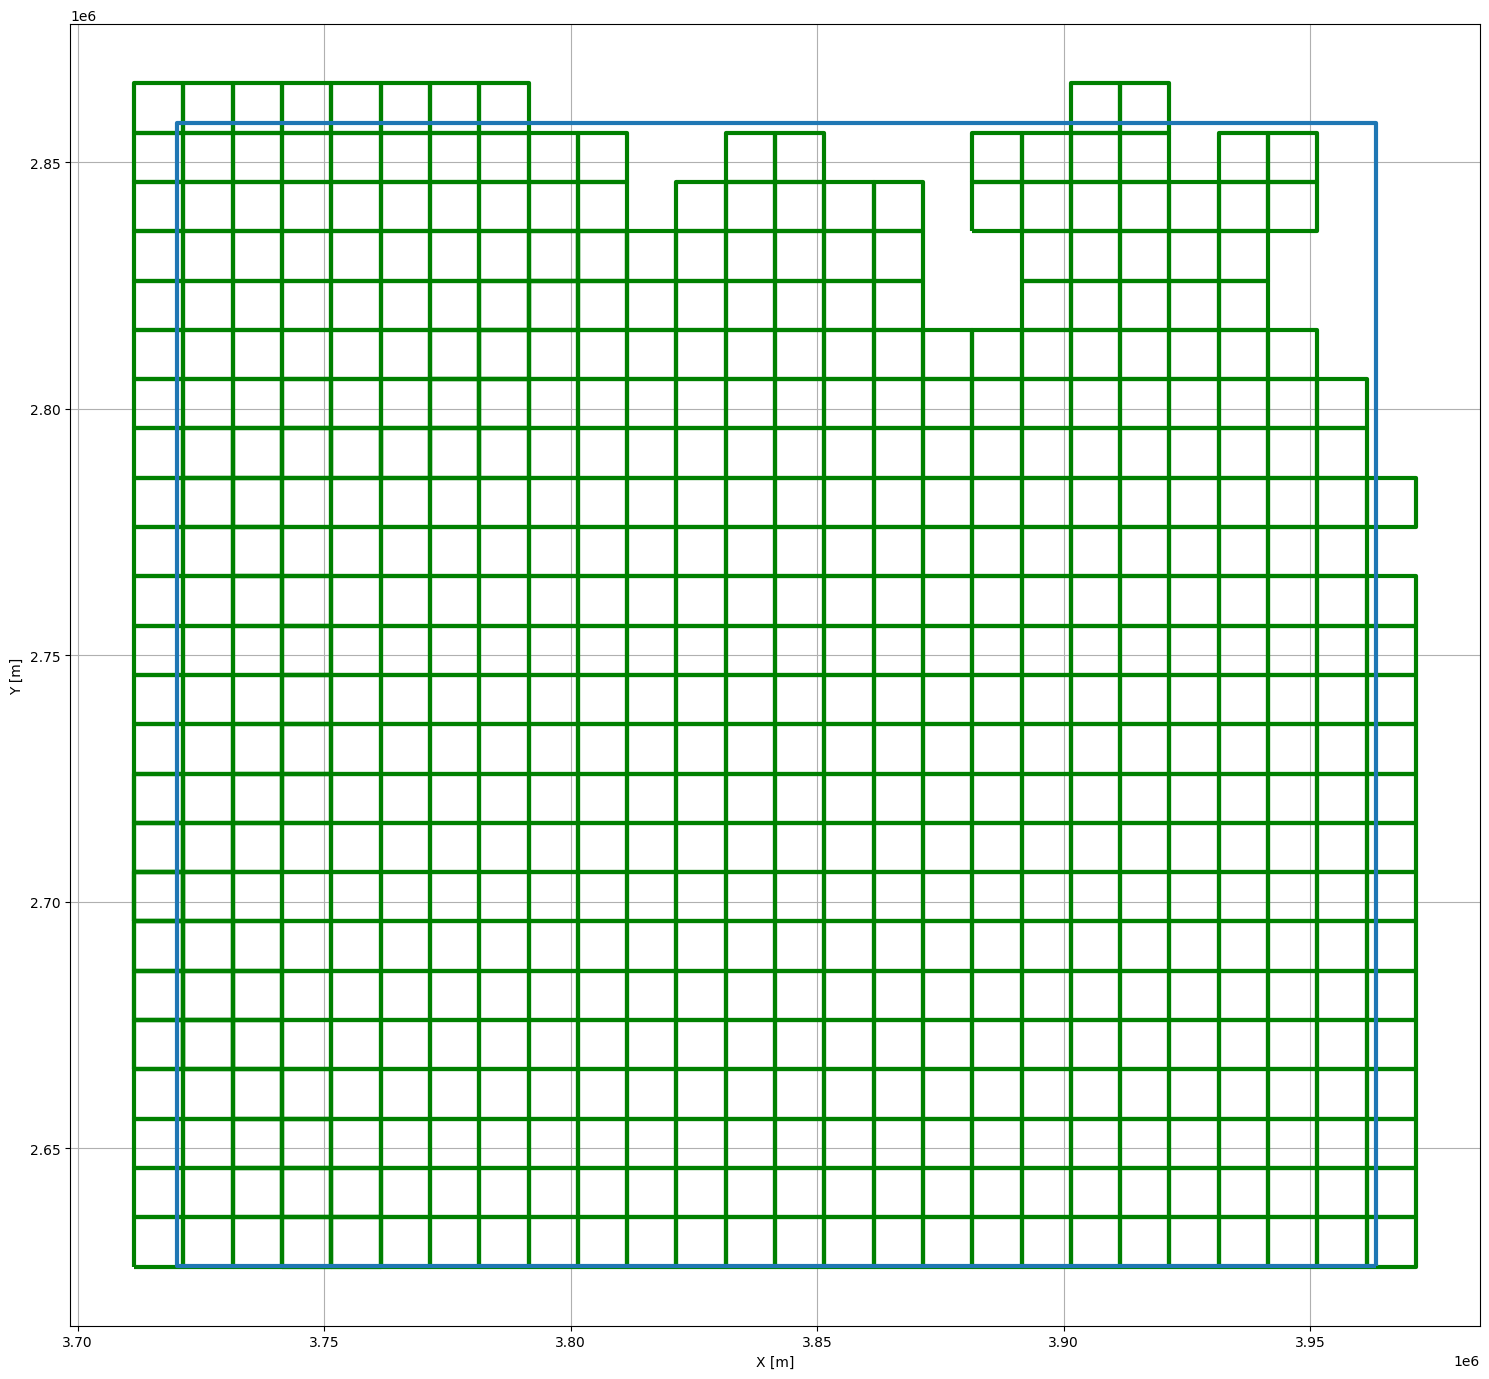

In [110]:
fig, ax = plt.subplots(figsize=(15,15))
mask_10km_cropped.boundary.plot(ax=ax, linewidth=3, color='green')
gdf.to_crs('EPSG:3034').boundary.plot(ax=ax, linewidth=3)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.tight_layout()

## Creating mask from cropped mask

Here, the final mask with a width and height of 100 m is created. 

In [111]:
mask_100m_cropped = processing.create_polygon_mask(gdf=mask_10km_cropped, 
                                                   step_size=3000,
                                                   crop_gdf=True)
mask_100m_cropped

geometry
0      POLYGON ((3711470.877 2625999.353, 3714470.877...
1      POLYGON ((3711470.877 2628999.353, 3714470.877...
2      POLYGON ((3711470.877 2631999.353, 3714470.877...
3      POLYGON ((3711470.877 2634999.353, 3714470.877...
4      POLYGON ((3714470.877 2625999.353, 3717470.877...
...                                                  ...
13456  POLYGON ((3969470.877 2772999.353, 3972470.877...
13457  POLYGON ((3969470.877 2775999.353, 3972470.877...
13458  POLYGON ((3969470.877 2778999.353, 3972470.877...
13459  POLYGON ((3969470.877 2781999.353, 3972470.877...
13460  POLYGON ((3969470.877 2784999.353, 3972470.877...

[13461 rows x 1 columns]

## Cropping Mask to outline

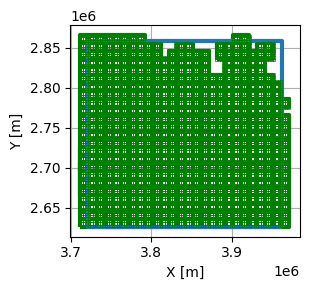

In [112]:
fig, ax = plt.subplots(figsize=(5,3))
mask_10km_cropped.boundary.plot(ax=ax, linewidth=3, color='green')
gdf.to_crs('EPSG:3034').boundary.plot(ax=ax, linewidth=3)
mask_100m_cropped.boundary.plot(ax=ax, linewidth=0.5, color='green')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.tight_layout()

#plt.savefig('../images/Data_Type_1_Outline.png', dpi=300)

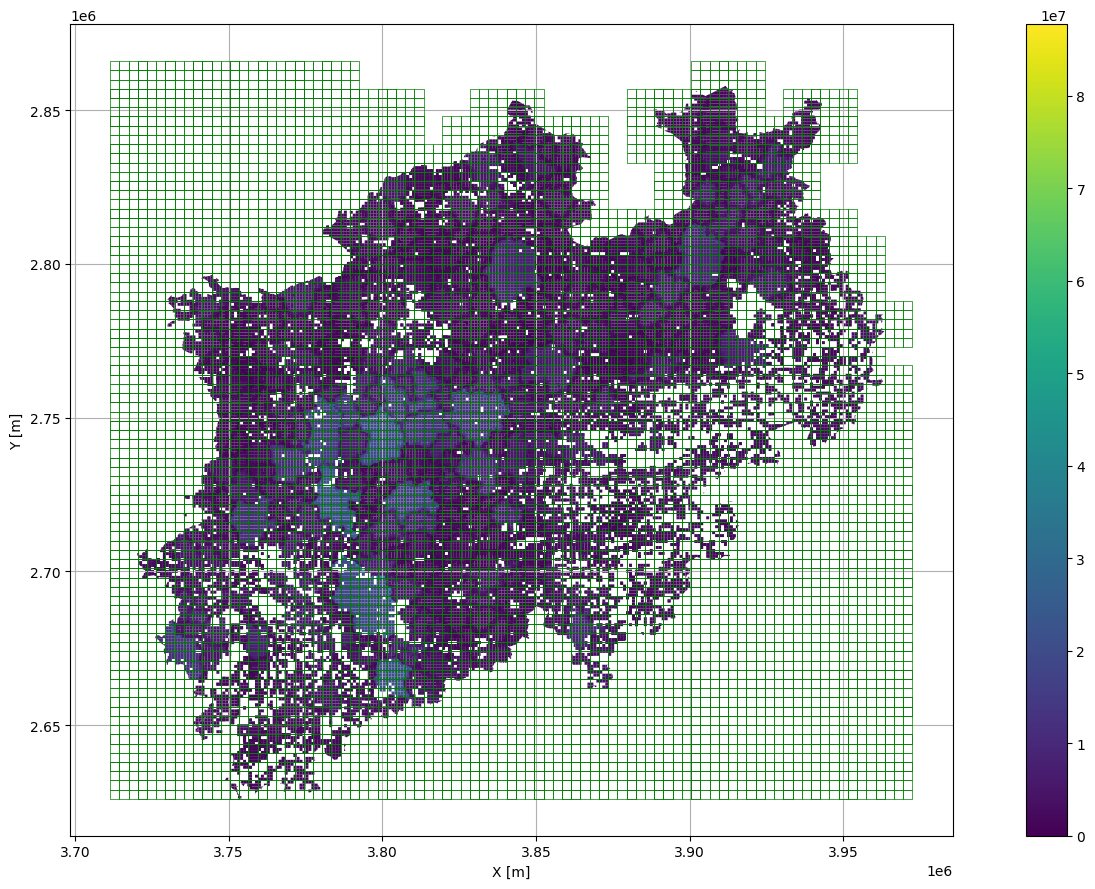

In [113]:
fig, ax = plt.subplots(figsize=(15,9))
# mask_10km_cropped.boundary.plot(ax=ax, linewidth=3, color='green')
# gdf.to_crs('EPSG:3034').boundary.plot(ax=ax, linewidth=3)
mask_100m_cropped.boundary.plot(ax=ax, linewidth=0.5, color='green')
data.plot(ax=ax, column='HD_final', legend=True)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.tight_layout()

## Calculate Heat Demand

With the vectorized raster and the 100 m mask, we can now directly calculate the heat demand using `calculate_hd`. 

In [114]:
hd_gdf = data
mask_gdf = mask_100m_cropped

In [115]:
gdf_hd = processing.calculate_hd(hd_gdf, 
                                 mask_gdf, 
                                 'HD_final')
gdf_hd 

C:\Users\ale93371\Documents\pyhd\notebooks\../pyhd\processing.py:182: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  hd_gdf = hd_gdf.explode().reset_index(drop=True)


HD                                           geometry
0     1.306975e+07  POLYGON ((3720470.877 2694999.353, 3723470.877...
1     1.966834e+06  POLYGON ((3717470.877 2703999.353, 3720470.877...
2     4.406444e+07  POLYGON ((3720470.877 2697999.353, 3723470.877...
3     6.742380e+07  POLYGON ((3720470.877 2700999.353, 3723470.877...
4     1.335781e+08  POLYGON ((3720470.877 2703999.353, 3723470.877...
...            ...                                                ...
3761  6.456146e+05  POLYGON ((3957470.877 2781999.353, 3960470.877...
3762  1.542641e+07  POLYGON ((3960470.877 2778999.353, 3963470.877...
3763  2.692901e+07  POLYGON ((3960470.877 2781999.353, 3963470.877...
3764  7.349168e+06  POLYGON ((3954470.877 2787999.353, 3957470.877...
3765  5.962814e+05  POLYGON ((3954470.877 2790999.353, 3957470.877...

[3766 rows x 2 columns]

<Axes: >

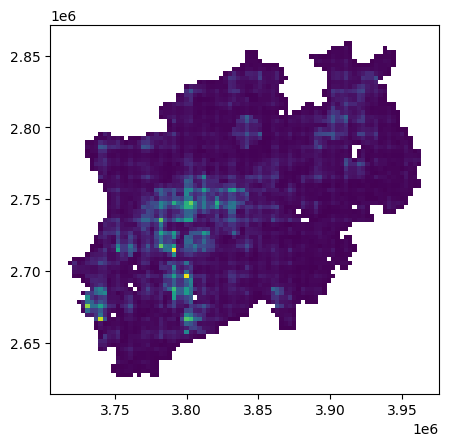

In [116]:
gdf_hd.plot(column='HD')

## Rasterizing Vector Data

The vector data will be rasterized and saved to file.

In [117]:
processing.rasterize_gdf_hd(gdf_hd, 
                     path_out='../data/Data_Type_III_Polygons_Administrative_Areas.tif',
                     crs = 'EPSG:3034', 
                     xsize = 3000,
                     ysize = 3000)

## Opening and plotting raster
The final raster can now be opened and plotted. 

In [118]:
raster = rasterio.open('../data/Data_Type_III_Polygons_Administrative_Areas.tif')

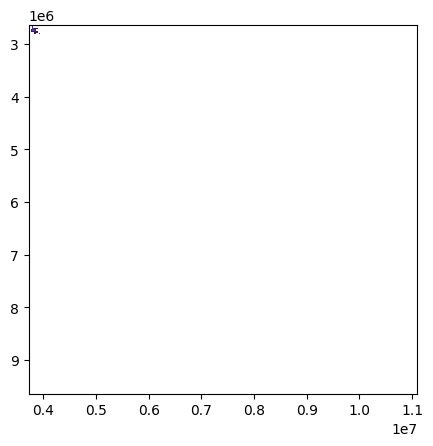

In [119]:
show(raster)